## KMeans Clustering

#### Steps
1. Decide # clusters
2. Select Random Centroids
3. Assign Clusters
4. Move Centroids
5. Check Finish

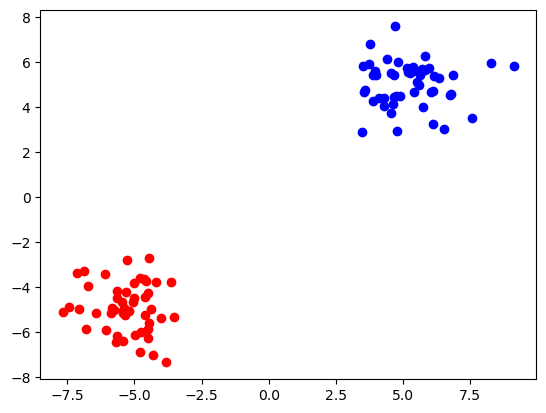

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from kmeans import KMeans

centroids =[(-5, -5), (5, 5)]
cluster_std = [1, 1]

X, y = make_blobs(n_samples=100, cluster_std=cluster_std, centers=centroids, n_features=2, random_state=2)

km = KMeans(n_clusters=2, max_iter=100)
y_means = km.fit_predict(X)

plt.scatter(X[y_means == 0, 0], X[y_means==0,1], color='red')
plt.scatter(X[y_means == 1, 0], X[y_means == 1,1], color='blue')
plt.show()


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('student_clustering.csv')
df.shape

(200, 2)

In [4]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


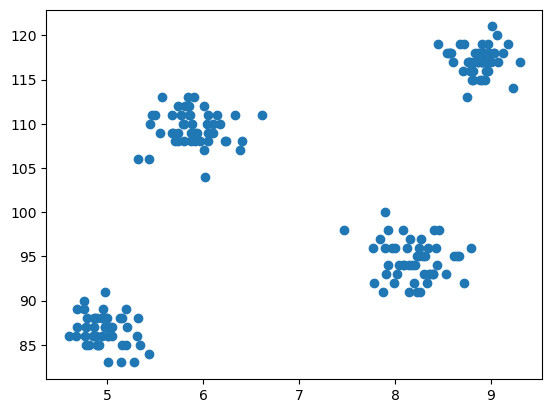

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'], df['iq'])

In [6]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

In [7]:
wcss

[29957.898288,
 4184.14127,
 2503.397581,
 681.96966,
 556.6603823704866,
 388.8524026875981,
 353.38640348327425,
 233.54082485509016,
 206.93812936151184,
 178.87744019190853]

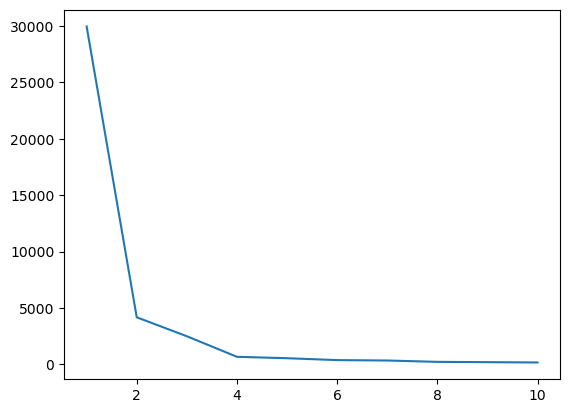

In [8]:
plt.plot(range(1, 11), wcss)

In [11]:
X = df.iloc[:, :].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

In [12]:
y_means

array([2, 3, 1, 1, 3, 3, 1, 0, 3, 1, 2, 3, 1, 2, 3, 1, 3, 1, 3, 3, 1, 2,
       1, 2, 2, 1, 2, 0, 1, 3, 0, 3, 0, 3, 1, 1, 0, 3, 2, 3, 2, 1, 1, 2,
       0, 0, 1, 3, 0, 3, 2, 2, 0, 1, 0, 3, 3, 0, 3, 0, 3, 1, 1, 0, 2, 0,
       1, 2, 3, 1, 3, 0, 1, 2, 3, 0, 3, 0, 2, 1, 1, 0, 3, 2, 0, 2, 0, 3,
       0, 3, 0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 3, 2, 2, 0, 2, 2, 1, 2, 0, 0,
       1, 0, 3, 3, 1, 0, 1, 3, 0, 2, 2, 3, 1, 0, 1, 2, 1, 3, 2, 1, 1, 3,
       2, 2, 3, 0, 3, 2, 1, 1, 1, 2, 3, 2, 2, 0, 2, 0, 3, 2, 0, 2, 0, 0,
       2, 1, 3, 0, 3, 1, 2, 0, 3, 1, 0, 2, 3, 2, 2, 0, 0, 3, 0, 2, 2, 1,
       0, 3, 2, 0, 0, 3, 3, 3, 1, 2, 1, 1, 0, 3, 1, 1, 2, 2, 1, 2, 0, 3,
       3, 0], dtype=int32)

In [13]:
X[y_means == 3, 1]

array([113., 110., 109., 110., 110., 108., 111., 111., 113., 106., 112.,
       106., 108., 113., 108., 109., 108., 111., 109., 104., 111., 109.,
       109., 112., 111., 109., 108., 110., 109., 111., 108., 109., 109.,
       111., 112., 109., 111., 107., 111., 110., 108., 109., 110., 108.,
       108., 110., 107., 111., 112., 108.])

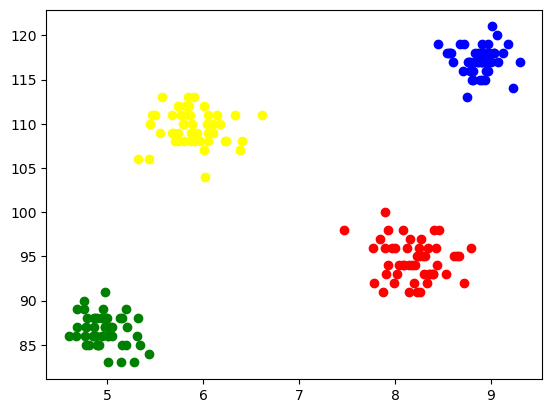

In [14]:
plt.scatter(X[y_means == 0,0], X[y_means == 0,1], color='blue')
plt.scatter(X[y_means == 1,0], X[y_means == 1,1], color='red')
plt.scatter(X[y_means == 2,0], X[y_means == 2,1], color='green')
plt.scatter(X[y_means == 3,0], X[y_means == 3,1], color='yellow')
plt.show()

### K-Means on 3d Data

In [20]:
centroids = [(-5, -5, -5), (5, 5, 5), (3.5, -2.5, 4), (-2.4, 2.5, -4)]
cluster_id = [1, 1, 1, 1]

cluster_std_3d = [1, 1, 1, 1]  # 4 values for 4 centers

X, y = make_blobs(n_samples=200, cluster_std=cluster_std_3d, centers=centroids, n_features=3, random_state=10)

In [21]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:, 2])
fig.show()

In [22]:
wcss = []
for i in range(1, 21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

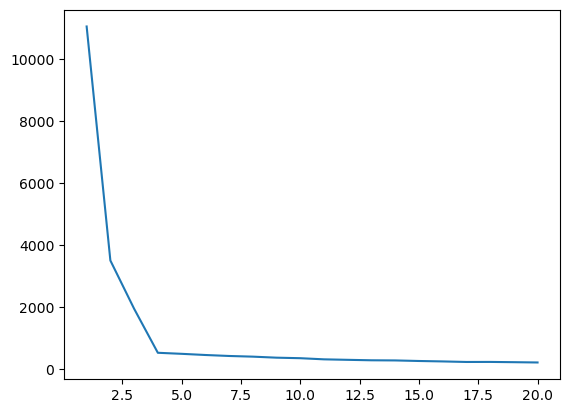

In [23]:
plt.plot(range(1, 21), wcss)

In [25]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [26]:
df = pd.DataFrame()

df['col1'] = X[:, 0]
df['col2'] = X[:, 1]
df['col3'] = X[:, 2]
df['label'] = y_pred

In [27]:
fig = px.scatter_3d(df, x='col1', y='col2', z='col3', color='label')
fig.show()

### Image Segmentation using KMeans Clustering

In [29]:
# Step 1: Import libraries and read the image
import numpy as np
import matplotlib.pyplot as plt
import cv2

def read_image():
    img = cv2.imread('bird_small.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img = img/255.0

    return img

In [30]:
# Step 2: Initialize Random Centroids
def initialize_means(img, clusters):
    # reshape it or flattening into a 2d matrix
    points = img.reshape((-1, img.shape[2]))
    m, n = points.shape

    means = np.zeros((clusters, n))

    # random initialization of means 
    for i in range(clusters):
        rand_indices = np.random.choice(m, size=10, replace=False)
        means[i] = np.mean(points[rand_indices], axis=0)

    return points, means

In [31]:
# Function to measure the euclidean distance (distance formula)
def distance(x1, y1, x2, y2):
    dist = np.square(x1 - x2) + np.square(y1 - y2)
    dist = np.sqrt(dist)
    return dist

In [ ]:
# Step4: Applying K-Means Clustering Algorithm

def k_means(points, means, clusters):
    iterations = 10 
    m, n = points.shape

    index = np.zeros(m)